#G2M insight for Cab Investment firm

---



Business problem:

XYZ is a private firm in US.
Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


**1.   Upload and check data quality**


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns
import missingno as msno
warnings.filterwarnings('ignore') # Turn off warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

**Read CSV files**

In [73]:
import pandas as pd
cab = pd.read_csv("cabData.csv", sep=';')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [74]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [75]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [76]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [77]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [78]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [79]:
trans= pd.read_csv("Transaction_ID.csv")
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [80]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [81]:
trans.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [82]:
customer = pd.read_csv("Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [83]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [84]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [85]:
customer.isnull().values.any()
cab.isnull().values.any()
city.isnull().values.any()
trans.isnull().values.any()

False


#2.   Prepare the master data by merging the four datasets (cab,trans,customer and city)





In [86]:
masterData= pd.merge(pd.merge(pd.merge(cab,trans),customer),city) 
masterData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [87]:
masterData.info()
masterData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [88]:
#replace the space in each column with '_'
masterData.columns=masterData.columns.str.strip().str.lower().str.replace(' ', '_')

In [89]:
masterData.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [90]:
masterData.shape

(359392, 14)

#3. Add new columns


In [91]:
#Adding new columns
#Extracting the day,weekday, month and the year from the date of travel
masterData['day'] = pd.DatetimeIndex(masterData["date_of_travel"]).day
masterData['Weekday'] = pd.DatetimeIndex(masterData["date_of_travel"]).weekday
masterData['month'] = pd.DatetimeIndex(masterData["date_of_travel"]).month
masterData['year'] = pd.DatetimeIndex(masterData["date_of_travel"]).year


In [92]:
#The Profit per one Trip which is the Differnce between Price Charged and Cost of trip
masterData['profit_per_one_trip'] = masterData['price_charged'] - masterData['cost_of_trip']

#The Profit per kilometre
masterData['profit_per_km'] = masterData['profit_per_one_trip'] / masterData['km_travelled']  

# Price Per kilometer Travelled
masterData["price_per_km"]= masterData["price_charged"] / masterData["km_travelled"]

#Cost Per Kilometer Travelled 
masterData["cost_per_km"]= masterData["cost_of_trip"] / masterData["km_travelled"]
#Profit Per year
#masterData["profit_per_year"]= masterData["profit_per_one_trip"] / masterData["year"]


In [93]:
# View the dataset
masterData.head(3)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,day,Weekday,month,year,profit_per_one_trip,profit_per_km,price_per_km,cost_per_km
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",1,0,8,2016,57.3150,1.882266,12.182266,10.30
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",21,5,7,2018,281.2772,10.739870,22.859870,12.12
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",23,4,11,2018,194.6480,4.574571,18.614571,14.04


#4. Exploratory Data Analysis

Descriptive statistics for master Data

In [94]:
masterData.describe()

,transaction_id,km_travelled,price_charged,cost_of_trip,customer_id,age,income_(usd/month),day,Weekday,month,year,profit_per_one_trip,profit_per_km,price_per_km,cost_per_km
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,3.463461,7.156047,2017.045199,137.253198,6.083579,18.765127,12.681548
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,1.940577,3.413283,0.800239,160.311840,5.543493,5.878560,1.167944
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,0.000000,1.000000,2016.000000,-220.060000,-4.998235,6.338621,10.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,2.000000,4.000000,2016.000000,28.012000,2.000385,14.451327,12.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,4.000000,8.000000,2017.000000,81.962000,4.466809,17.153501,12.840000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,5.000000,10.000000,2018.000000,190.030000,9.170006,22.234926,13.680000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,6.000000,12.000000,2018.000000,1463.966000,41.115556,53.955556,14.400000


It display valid values

Check if exist duplicate rows 

In [95]:
Checkduplicate = masterData[masterData.duplicated()]
Checkduplicate

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,day,Weekday,month,year,profit_per_one_trip,profit_per_km,price_per_km,cost_per_km


It doesn't contain any duplicate rows

#5. Data visualization of features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80e330cbd0>,
      dtype=object)

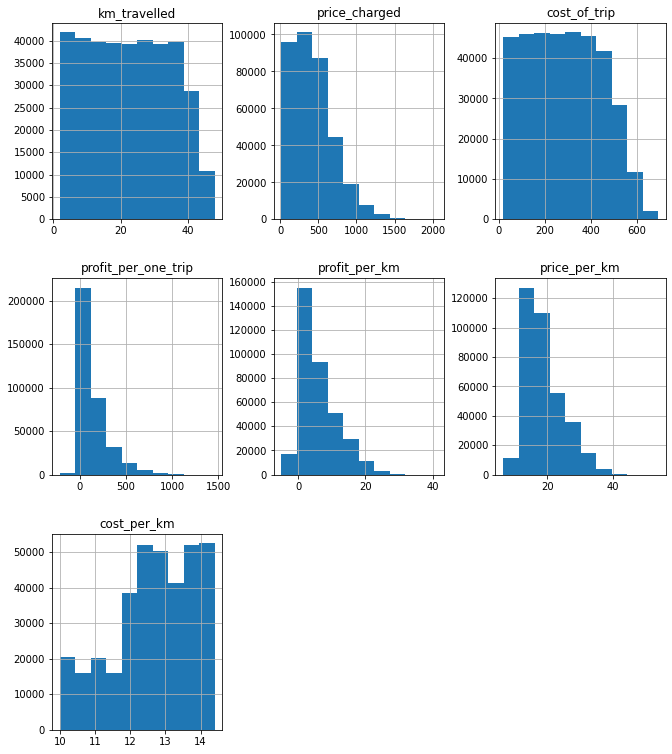

In [96]:
#Data Visualization¶
numericValues = masterData.select_dtypes(include=['float'])
numericValues.hist(figsize=(11,13))

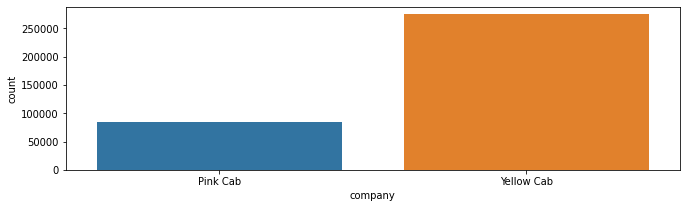

In [97]:
categoricValues = masterData.select_dtypes(include=['object'])
plt.figure(figsize=(11,3))
sns.countplot(data=categoricValues, x='company')

Yellow cab company is in high demand more than twice as much as the Pink cab

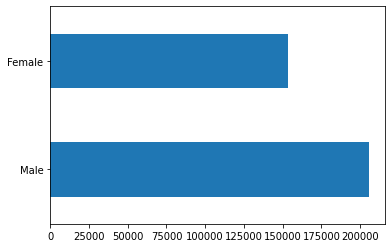

In [98]:
masterData['gender'].value_counts().plot.barh();

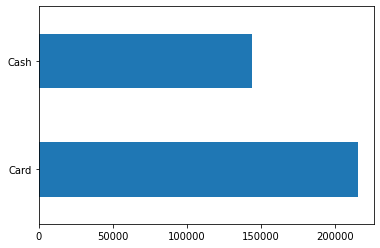

In [99]:
masterData['payment_mode'].value_counts().plot.barh();

The card payment method is more used than cash

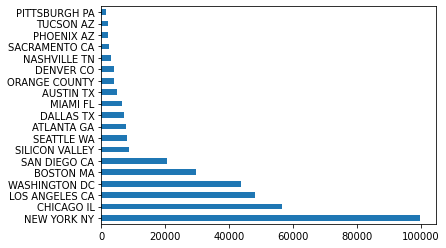

In [100]:
masterData['city'].value_counts().plot.barh();

6. Data Connections

In [101]:
masterData['km_travelled'] = pd.to_numeric(masterData['km_travelled'], errors='coerce')
masterData['price_charged'] = pd.to_numeric(masterData['price_charged'], errors='coerce')
masterData['cost_of_trip'] = pd.to_numeric(masterData['cost_of_trip'], errors='coerce')
masterData['age'] = pd.to_numeric(masterData['age'], errors='coerce')
masterData['income_(usd/month)'] = pd.to_numeric(masterData['income_(usd/month)'], errors='coerce')
#save the master data
masterData.to_csv('masterData.csv', sep=';')
masterData=pd.read_csv("masterData.csv" , sep=';')
masterData.head(3)
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           359392 non-null  int64  
 1   transaction_id       359392 non-null  int64  
 2   date_of_travel       359392 non-null  object 
 3   company              359392 non-null  object 
 4   city                 359392 non-null  object 
 5   km_travelled         359392 non-null  float64
 6   price_charged        359392 non-null  float64
 7   cost_of_trip         359392 non-null  float64
 8   customer_id          359392 non-null  int64  
 9   payment_mode         359392 non-null  object 
 10  gender               359392 non-null  object 
 11  age                  359392 non-null  int64  
 12  income_(usd/month)   359392 non-null  int64  
 13  population           359392 non-null  object 
 14  users                359392 non-null  object 
 15  day              

**City analysis**

In [102]:
city_grp = masterData.groupby('city')
city_grp['company'].value_counts().unstack()

company,Pink Cab,Yellow Cab
city,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


Yellow Cab is more preffered by users over Pink Cabs, and, New York City has the highest number of user in the data set.

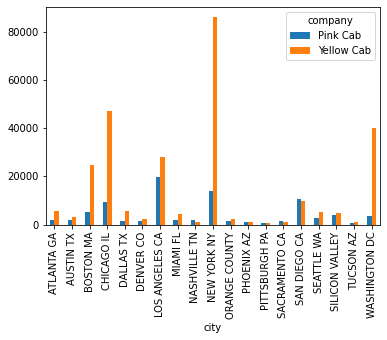

In [103]:
pd.crosstab(index=masterData['city'],columns=masterData['company']).plot(kind='bar')
plt.show()

In [104]:
city_grp = masterData.groupby('city')
city_grp['company'].value_counts().unstack()

company,Pink Cab,Yellow Cab
city,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


Yellow cab company it is more in demand than Pink cab company in almost all cities

**Payment mode analysis**

In [105]:
pd.crosstab(index=masterData['payment_mode'],columns=masterData['company'],margins=True)

company,Pink Cab,Yellow Cab,All
payment_mode,,,
Card,50719,164785,215504
Cash,33992,109896,143888
All,84711,274681,359392


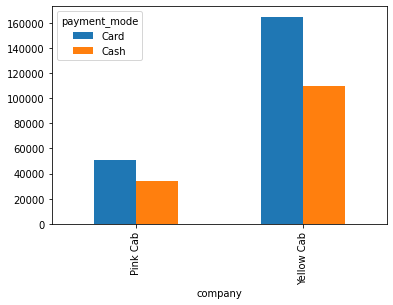

In [106]:
pd.crosstab(index=masterData['company'],columns=masterData['payment_mode']).plot(kind='bar')
plt.show()

The Card payment method is more used than Cash in both, pink cab and yellow cab

**Gender analysis**

In [107]:
pd.crosstab(index=masterData['gender'],columns=masterData['company'],margins=True)

company,Pink Cab,Yellow Cab,All
gender,,,
Female,37480,116000,153480
Male,47231,158681,205912
All,84711,274681,359392


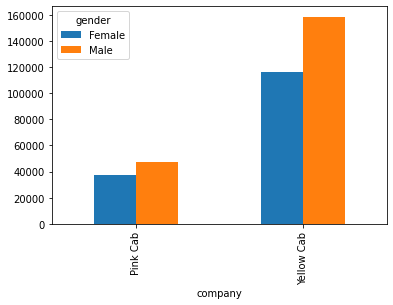

In [108]:
pd.crosstab(index=masterData['company'],columns=masterData['gender']).plot(kind='bar')
plt.show()

The number of Male who travel by taxi is high compared to female users

**Age analysis**

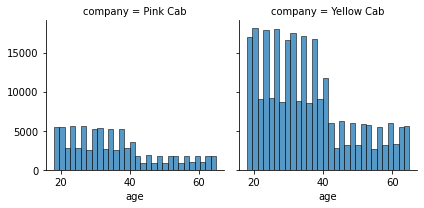

In [109]:
# Age range for Company
g = sns.FacetGrid(masterData, col = "company")
g.map(sns.histplot, "age", bins = 30)
plt.show()

The highest number of Yellow cab users and Pink cab users are middle-aged

**Price Charged Analysis**

1. Hypothesis: Is there a differnce in the price charged by the two cab company?

In [110]:
company_type = masterData.groupby("company")
company_type.mean().loc[:,["price_charged"]]

,price_charged
company,
Pink Cab,310.800856
Yellow Cab,458.181990


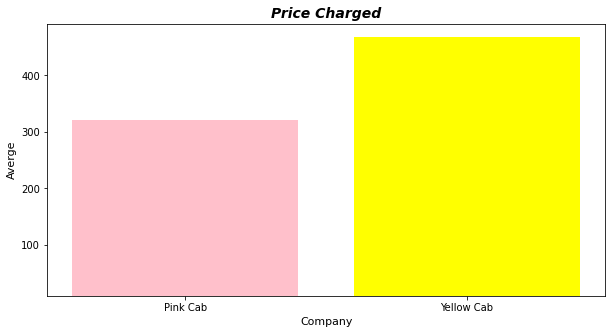

In [111]:
plt.figure(figsize=(10,5))
plt.bar(company_type.mean().index,company_type.mean()["price_charged"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("Price Charged",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("price_charged.png",dpi=100)
plt.show()

**Profit Analysis**

2. Hypothesis: Is there a differnce in the profit per one trip by the two cab company?

In [112]:
company_type.mean().loc[:,["profit_per_one_trip"]]

,profit_per_one_trip
company,
Pink Cab,62.652174
Yellow Cab,160.259986


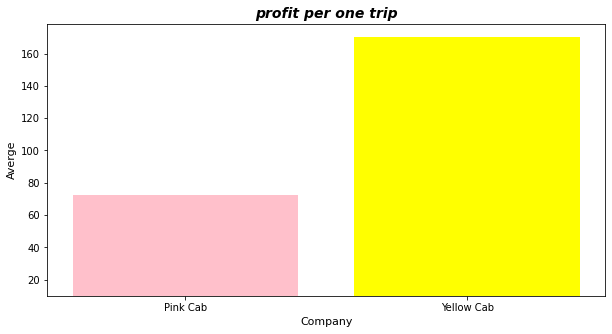

In [113]:
plt.figure(figsize=(10,5))
plt.bar(company_type.mean().index,company_type.mean()["profit_per_one_trip"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("profit per one trip",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("price_charged.png",dpi=100)
plt.show()

**Income Analysis**

3. Hypothesis: Is there a differnce in the income (usd/month) by the two cab company?

In [114]:
company_type.mean().loc[:,["income_(usd/month)"]]

,income_(usd/month)
company,
Pink Cab,15059.047137
Yellow Cab,15045.669817


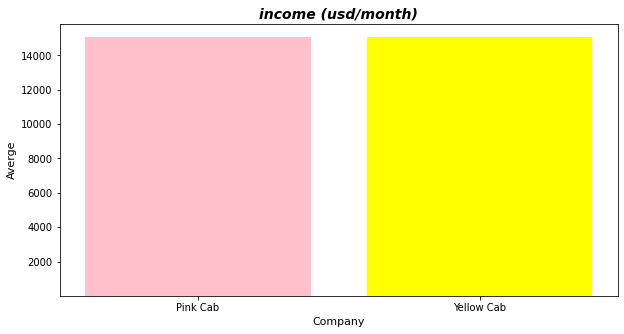

In [115]:
plt.figure(figsize=(10,5))
plt.bar(company_type.mean().index,company_type.mean()["income_(usd/month)"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("income (usd/month)",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("price_charged.png",dpi=100)
plt.show()

**KM Travelled analysis**

4. Hpothesis: Is there difference in the KM travelled by two cab company?

In [116]:
company_type.mean().loc[:,["km_travelled"]]

,km_travelled
company,
Pink Cab,22.559917
Yellow Cab,22.569517


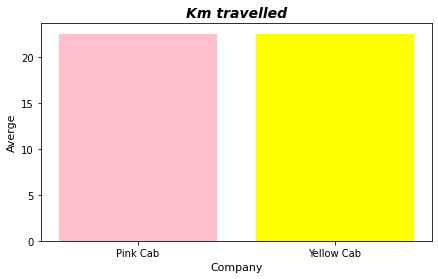

In [117]:
plt.figure(figsize=(7,4))
plt.bar(company_type.mean().index,company_type.mean()["km_travelled"],color=["pink","yellow"])
plt.xlabel("Company",fontsize=11)
plt.ylabel("Averge",fontsize=11)
plt.title("Km travelled",fontsize=14,fontstyle="italic",fontweight="bold")
plt.savefig("KM.png", dpi=100)
plt.show()

We didn't notice any difference in the KM travelled between Yellow and Pink Cab

**Profit per KM/City**

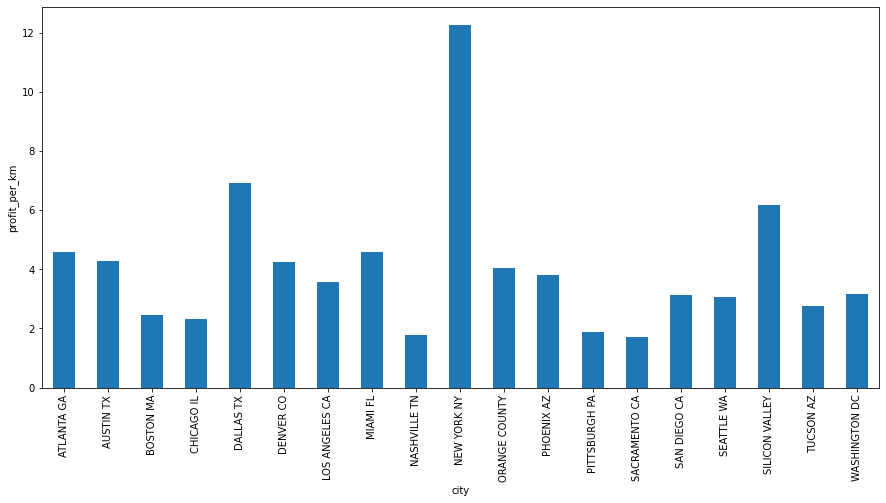

In [118]:
masterData.groupby('city')['profit_per_km'].median().plot(kind='bar', figsize=(15,7), ylabel='profit_per_km');


Based on the graph, the highest Profit per km is in favor of New York City, however the lowest Profit per KM is in favor of Sacramenyo has.

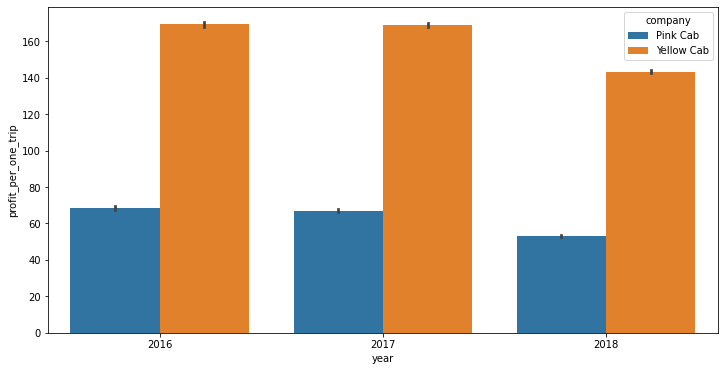

In [119]:
# Profit distribution by year and company
plt.figure(figsize=(12,6))
ax = sns.barplot(x='year', y="profit_per_one_trip", hue="company", data=masterData)


Overall Yellow company profit per one trip is higher more than twice than Pink company in the three years.



**Customer per company analysis**

In [120]:
print(len(masterData.customer_id.unique()), 'customers')


46148 customers


In [121]:
masterData.groupby(['customer_id','company', ]).size().to_frame('size').reset_index()


,customer_id,company,size
0,1,Pink Cab,4
1,1,Yellow Cab,25
2,2,Pink Cab,4
3,2,Yellow Cab,36
4,3,Pink Cab,6
...,...,...,...
72221,59998,Yellow Cab,6
72222,59999,Pink Cab,2
72223,59999,Yellow Cab,6
72224,60000,Pink Cab,4


Many customers choose to use Yellow cab company more to travel.
the same customer sometimes travel with both companies. 

In [122]:
cal= masterData.groupby(['customer_id','company' ]).size().to_frame('size').reset_index()
cal.groupby('company').sum()

,customer_id,size
company,,
Pink Cab,831664558,84711
Yellow Cab,1049163053,274681


The highest number of customers in the cab industry is in the favor of Yellow cab 

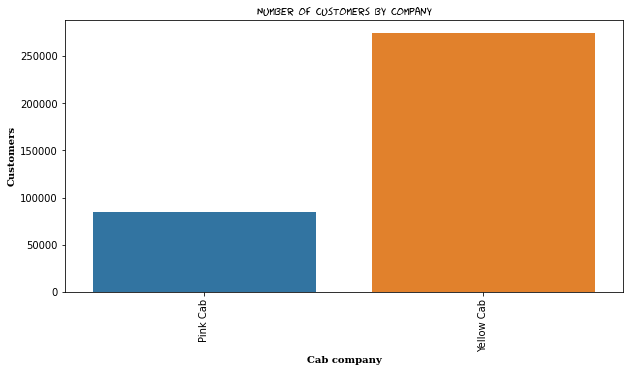

In [123]:
plt.figure(figsize=(10, 5))
sns.countplot(masterData.company)
plt.xticks(rotation=90)

plt.title("Number of customers by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Customers", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Cab company", {"fontname": "serif", "fontweight":"bold"})
plt.xticks(rotation=90)
plt.show()

**Week Analysis**

Hypothesis: Does the profit of each company increase in week?

In [124]:
weekday_group = masterData.groupby([masterData['Weekday'], 'company'])
(weekday_group[['km_travelled', 'profit_per_one_trip', 'profit_per_km','company']].median())


km_travelled  profit_per_one_trip  profit_per_km
Weekday company                                                     
0       Pink Cab           22.05              34.3105       2.058884
        Yellow Cab         22.42              93.1312       5.103434
1       Pink Cab           22.61              35.6000       2.134995
        Yellow Cab         22.41              96.6506       5.391836
2       Pink Cab           22.26              36.4670       2.106509
        Yellow Cab         22.42              93.1888       5.149244
3       Pink Cab           22.40              36.0680       2.139563
        Yellow Cab         22.26              89.9904       5.025000
4       Pink Cab           22.66              45.9650       2.612900
        Yellow Cab         22.47             106.1260       5.792595
5       Pink Cab           22.31              46.1200       2.706624
        Yellow Cab         22.60             109.9228       5.876486
6       Pink Cab           22.54              47.7005       2.751732
        Yellow Cab         22.60             112.7820       6.159612

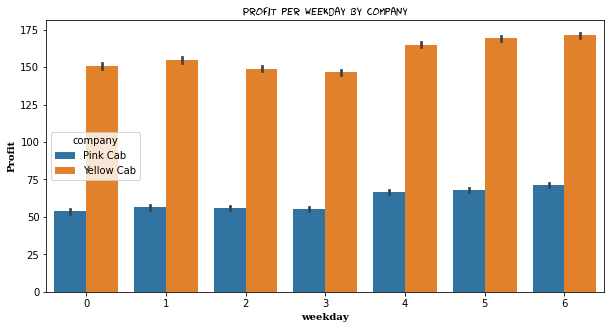

In [125]:
plt.figure(figsize=(10, 5))
sns.barplot(x = masterData['Weekday'] , y= masterData['profit_per_one_trip'] , hue = masterData['company'])

plt.title("Profit per weekday by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Profit", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("weekday", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Profit per one trip increases in the weekends, especially, in Yellow cab.
This increase is caused by the increase of kilometres travelled.


**seasonality Analysis**

Hypothesis: Is there any seasonality in the profit of each company?

In [126]:
monthGroup = masterData.groupby(['month','company'])
(monthGroup[['km_travelled', 'profit_per_one_trip', 'profit_per_km']].median()).unstack()

km_travelled             ... profit_per_km           
company     Pink Cab Yellow Cab  ...      Pink Cab Yellow Cab
month                            ...                         
1             22.355      22.54  ...      2.454020   6.074740
2             22.310      22.57  ...      2.736672   6.051205
3             23.520      22.22  ...      2.890560   6.010245
4             22.080      22.47  ...      2.184878   5.971364
5             22.000      22.23  ...      1.898216   6.777619
6             22.600      22.31  ...      1.999074   5.966703
7             22.260      22.66  ...      2.071250   4.656637
8             22.230      22.31  ...      2.269637   4.618318
9             22.440      22.42  ...      2.157562   5.650641
10            22.420      22.54  ...      2.514739   5.537637
11            22.420      22.61  ...      2.598498   4.671760
12            22.610      22.60  ...      3.268564   5.509328

[12 rows x 6 columns]

The profit margin for yellow cab is always greater than Pink cab

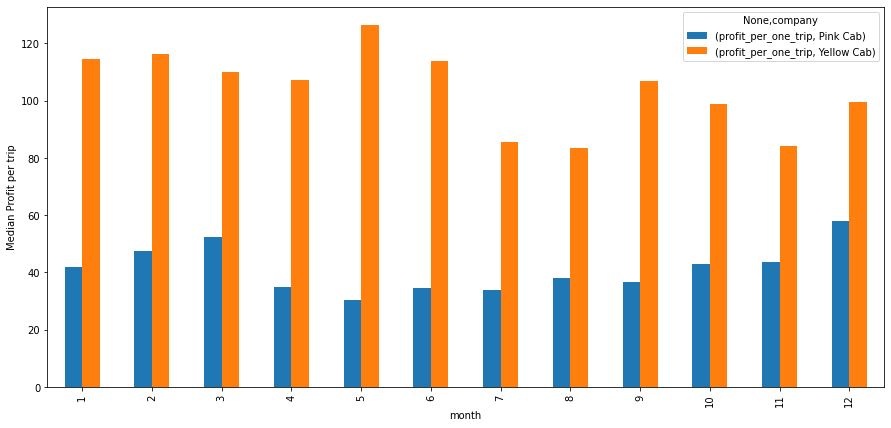

In [127]:
((monthGroup[['profit_per_one_trip']].median()).unstack()).plot(kind='bar', figsize=(15,7), ylabel='Median Profit per trip');


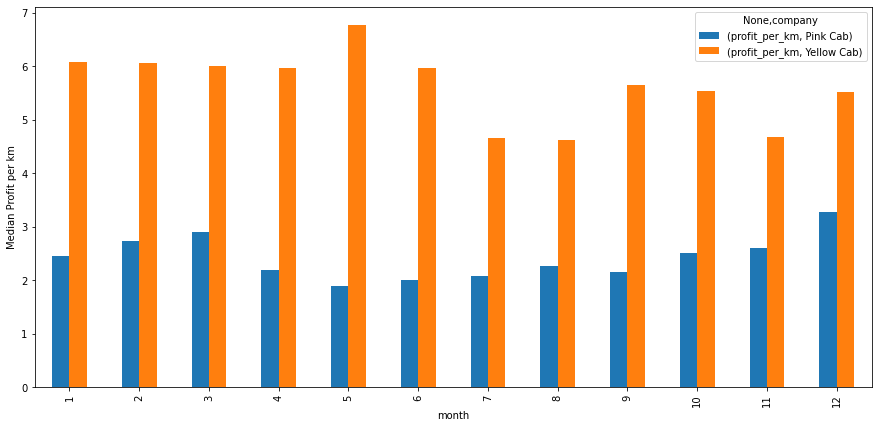

In [128]:
((monthGroup[['profit_per_km']].median()).unstack()).plot(kind='bar', figsize=(15,7), ylabel='Median Profit per km');


The profit increase in the spring season especially in May.

During July and August, both companys recorded a decrease in profit per km and profit per one trip. We can say that there's some seasonality 



**Yearly analysis**


**Hypothesis: what's the mean profit of each company in each year ?**



In [129]:
profit_year = masterData.groupby([masterData['year'], masterData['company']])['profit_per_one_trip'].mean().to_frame().reset_index()
profit_year


,year,company,profit_per_one_trip
0,2016,Pink Cab,68.321819
1,2016,Yellow Cab,169.347821
2,2017,Pink Cab,67.070839
3,2017,Yellow Cab,168.817057
4,2018,Pink Cab,53.229689
5,2018,Yellow Cab,143.416122


in 2018, profit margin has decreased in the Pink cab.
Compared to Yellow cab profit, Pink cab profit is much less .

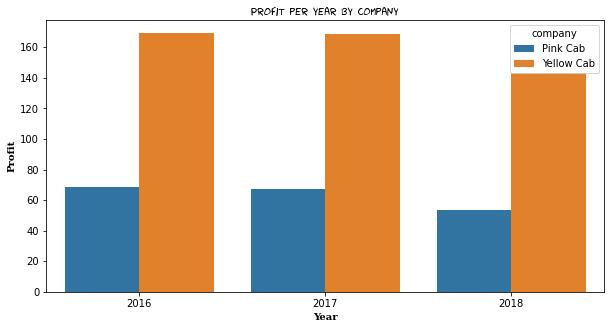

In [130]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'year' , y= 'profit_per_one_trip' , hue = 'company', data = profit_year)

plt.title("Profit per year by company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Profit", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

**Hypothesis: what's the mean prive of each company in every year ?**



In [131]:
priceCharg_year = masterData.groupby([masterData['year'], 'company'])['price_charged'].mean().to_frame().reset_index()
priceCharg_year

,year,company,price_charged
0,2016,Pink Cab,315.330113
1,2016,Yellow Cab,467.918301
2,2017,Pink Cab,315.907442
3,2017,Yellow Cab,466.639950
4,2018,Pink Cab,301.642530
5,2018,Yellow Cab,440.875558


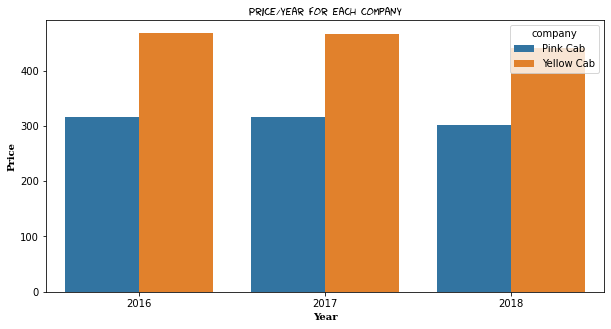

In [132]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'year' , y= 'price_charged' , hue = 'company', data = priceCharg_year)

plt.title("Price/year for each company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Price", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Yellow Company has the highest price charged along three years.

**Hypothesis: Which company has maximum cab users every year?**


In [133]:
customer_per_year = masterData.groupby([masterData['year'], 'company'])['customer_id'].count().to_frame().reset_index()
customer_per_year

,year,company,customer_id
0,2016,Pink Cab,25080
1,2016,Yellow Cab,82239
2,2017,Pink Cab,30321
3,2017,Yellow Cab,98189
4,2018,Pink Cab,29310
5,2018,Yellow Cab,94253


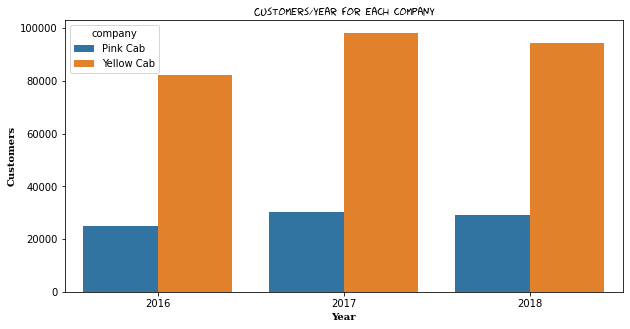

In [134]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'year' , y= 'customer_id' , hue = 'company', data = customer_per_year)

plt.title("Customers/year for each company", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("Customers", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Year", {"fontname": "serif", "fontweight":"bold"})
plt.show()

Over years, Yellow company has the highest number of customers, especially in 2017



**Add Us holidays data set**

In [135]:
import pandas as pd
holiday = pd.read_csv('https://query.data.world/s/xfi2xhr5c5zo2l3ryb3ldbbxdnqfc2')
holiday.head()

,Date,Holiday
0,12/31/2010,New Year's Day
1,1/17/2011,"Birthday of Martin Luther King, Jr."
2,2/21/2011,Washington's Birthday
3,5/30/2011,Memorial Day
4,7/4/2011,Independence Day


In [136]:
holiday['Date'] = pd.to_datetime(holiday['Date'])

In [137]:
holiday['weekend'] = pd.DatetimeIndex(holiday["Date"]).dayofweek
holiday.head(100)

,Date,Holiday,weekend
0,2010-12-31,New Year's Day,4
1,2011-01-17,"Birthday of Martin Luther King, Jr.",0
2,2011-02-21,Washington's Birthday,0
3,2011-05-30,Memorial Day,0
4,2011-07-04,Independence Day,0
...,...,...,...
95,2020-09-07,Labor Day,0
96,2020-10-12,Columbus Day,0
97,2020-11-11,Veterans Day,2
98,2020-11-26,Thanksgiving Day,3


In [138]:
holiday.head()

,Date,Holiday,weekend
0,2010-12-31,New Year's Day,4
1,2011-01-17,"Birthday of Martin Luther King, Jr.",0
2,2011-02-21,Washington's Birthday,0
3,2011-05-30,Memorial Day,0
4,2011-07-04,Independence Day,0


In [139]:
#holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday.sort_values(by='Date', inplace=True)
holiday.reset_index().set_index('Date',drop=False, inplace=True)

masterData = pd.merge(masterData, holiday, left_index=True, right_index=True)
masterData.head()

,Unnamed: 0,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,day,Weekday,month,year,profit_per_one_trip,profit_per_km,price_per_km,cost_per_km,Date,Holiday,weekend
0,0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",1,0,8,2016,57.3150,1.882266,12.182266,10.30,2010-12-31,New Year's Day,4
1,1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",21,5,7,2018,281.2772,10.739870,22.859870,12.12,2011-01-17,"Birthday of Martin Luther King, Jr.",0
2,2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",23,4,11,2018,194.6480,4.574571,18.614571,14.04,2011-02-21,Washington's Birthday,0
3,3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",1,2,6,2016,23.6660,0.826904,12.526904,11.70,2011-05-30,Memorial Day,0
4,4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",21,5,4,2018,253.9808,6.981330,19.821330,12.84,2011-07-04,Independence Day,0


In [140]:
masterData.to_csv('masterDataNew.csv', sep=';')

In [141]:
masterData=pd.read_csv("masterDataNew (1).csv" , sep=';')


Due to the difficulty to replace Null weekend value with False and the rest with True, Excel is used.

In [142]:
masterData.head(20)

,Unnamed: 0,Unnamed: 0.1,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,day,Weekday,month,year,profit_per_one_trip,profit_per_km,price_per_km,cost_per_km,Date_x,Holiday_x,weekend_x,Date_y,Holiday_y,weekend_y
0,0,0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",1,0,8,2016,57.3150,1.882266,12.182266,10.30,31/12/2010,New Year's Day,False,31/12/2010,New Year's Day,True
1,1,1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",21,5,7,2018,281.2772,10.739870,22.859870,12.12,17/01/2011,"Birthday of Martin Luther King, Jr.",False,17/01/2011,"Birthday of Martin Luther King, Jr.",False
2,2,2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",23,4,11,2018,194.6480,4.574571,18.614571,14.04,21/02/2011,Washington's Birthday,False,21/02/2011,Washington's Birthday,False
3,3,3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",1,2,6,2016,23.6660,0.826904,12.526904,11.70,30/05/2011,Memorial Day,False,30/05/2011,Memorial Day,False
4,4,4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",21,5,4,2018,253.9808,6.981330,19.821330,12.84,04/07/2011,Independence Day,False,04/07/2011,Independence Day,False
5,5,5,10324737,04/05/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",5,3,4,2018,50.8912,8.234822,22.394822,14.16,05/09/2011,Labor Day,False,05/09/2011,Labor Day,False
6,6,6,10395626,27/10/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701",27,5,10,2018,25.0960,1.874235,12.474235,10.60,10/10/2011,Columbus Day,False,10/10/2011,Columbus Day,False
7,7,7,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",1,0,2,2016,27.5680,3.049558,13.849558,10.80,11/11/2011,Veterans Day,False,11/11/2011,Veterans Day,True
8,8,8,10079404,21/09/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",21,2,9,2016,210.0920,5.305354,17.785354,12.48,24/11/2011,Thanksgiving Day,False,24/11/2011,Thanksgiving Day,True
9,9,9,10186994,23/06/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701",23,4,6,2017,118.9736,6.540605,20.100605,13.56,26/12/2011,Christmas Day,False,26/12/2011,Christmas Day,False


In [143]:
masterData.drop('Unnamed: 0', axis=1, inplace=True)
masterData.drop('Unnamed: 0.1', axis=1, inplace=True)


In [144]:
masterData.drop('Date_x', axis=1, inplace=True)
masterData.drop('Holiday_x', axis=1, inplace=True)
masterData.drop('weekend_x', axis=1, inplace=True)

In [145]:
masterData.groupby('weekend_y')['km_travelled'].mean()

weekend_y
False    22.560806
True     25.747368
Name: km_travelled, dtype: float64

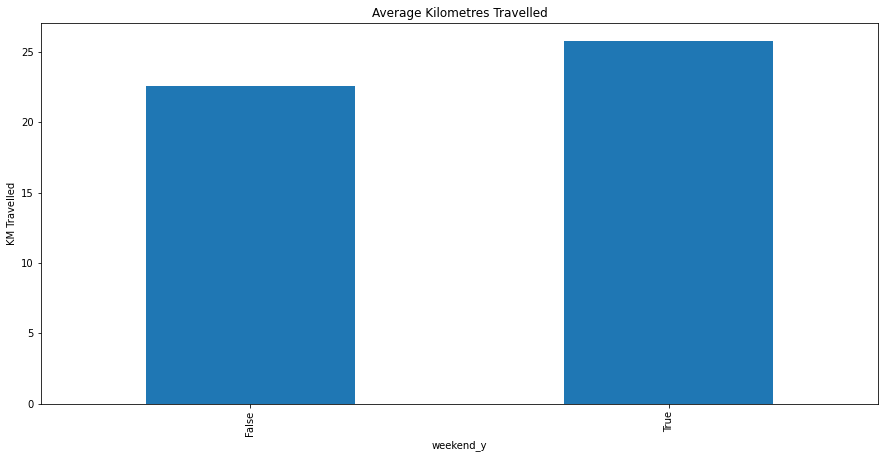

In [146]:
masterData.groupby('weekend_y')['km_travelled'].mean().plot(kind='bar', figsize=(15,7), ylabel='KM Travelled', title='Average Kilometres Travelled');

Distance travelled  for weekends is more big than weekdays


In [147]:
masterData.groupby('Holiday_y')['km_travelled'].median()

Holiday_y
Birthday of Martin Luther King, Jr.    26.780
Christmas Day                          21.095
Columbus Day                           23.300
Independence Day                       25.160
Labor Day                              14.615
Memorial Day                           24.975
New Year's Day                         32.985
Thanksgiving Day                       33.175
Veterans Day                           17.500
Washington's Birthday                  24.525
Name: km_travelled, dtype: float64

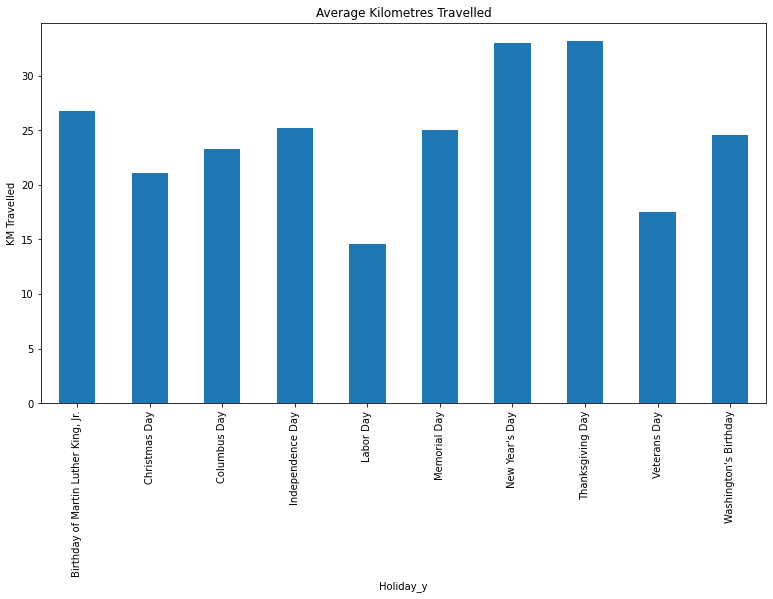

In [148]:
masterData.groupby('Holiday_y')['km_travelled'].median().plot(kind='bar', figsize=(13,7), ylabel='KM Travelled', title='Average Kilometres Travelled');

The maximum avearge kilometres travelled is in Thanksgiving Day.


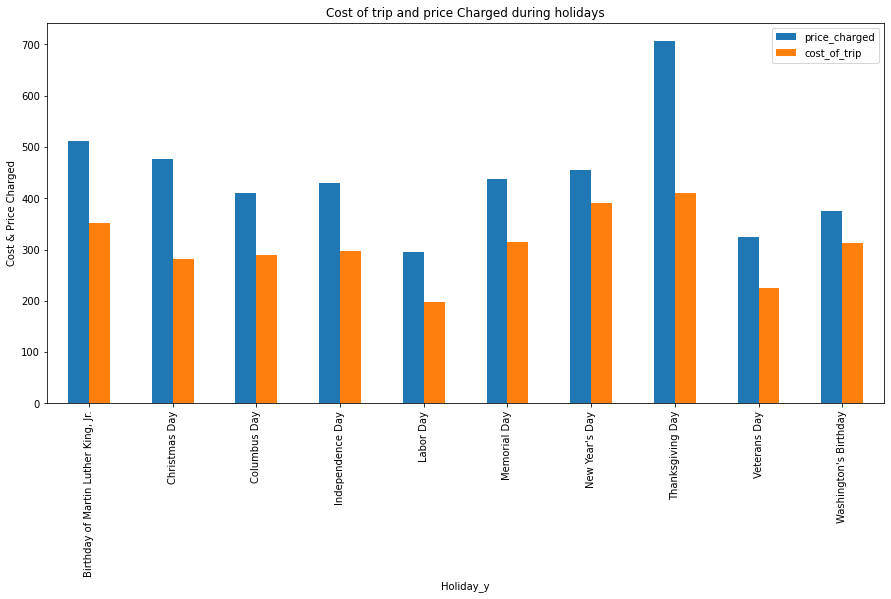

In [149]:
masterData.groupby('Holiday_y')['price_charged', 'cost_of_trip'].median().plot(kind='bar', figsize=(15,7), ylabel='Cost & Price Charged', title='Cost of trip and price Charged during holidays');


**In order to determine if there is a significant difference between the means of two groups, We will use a type of inferential statistic called, T-test.**

In [150]:
import scipy.stats as stat
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

sample_size = int((10/100)*359392) 
def T_test(a, b):
    sample_a = np.random.choice(a, sample_size)
    sample_b = np.random.choice(b, sample_size)
    ttest, p_value = ttest_ind(sample_a, sample_b, equal_var = False)
    print(f'p-value: {p_value}')
    if p_value < 0.05:    # alpha value is 0.05 or 5%
        print("Reject null hypothesis (H0)")
    else:
        print("Accept null hypothesis (H0)")

**On KM travelled:**

Hypothesis: 

H0 = KM travelled by Yellow Cab and Pink Cab are equal

H1 = KM travelled by Yellow Cab and Pink Cab are not equal


In [151]:
masterData['km_travelled'].groupby(masterData['company']).mean()

company
Pink Cab      20.738929
Yellow Cab    24.951111
Name: km_travelled, dtype: float64

In [152]:
T_test(masterData[masterData['company'] == 'Yellow Cab']['km_travelled'], masterData[masterData['company'] == 'Pink Cab']['km_travelled'])

p-value: 0.0
Reject null hypothesis (H0)


**On profit per one trip**

Hypothesis:

H0 = Profit per one trip for weekdays and weekends are identical

H1 = Profit per one trip for weekdays and weekends are not identical



In [153]:
#masterData['profit_per_one_trip'].groupby(masterData['weekend']).mean()

In [154]:
#T_test(masterData[masterData['weekend'] > 0]['profit_per_one_trip'], masterData[masterData['weekend'] == 0]['profit_per_one_trip'])


Hypothesis:

H0 = Profit is same for both Yellow cab and Pink cab

H1 = Profit is not same for both Yellow cab and Pink cab

In [155]:
masterData['profit_per_one_trip'].groupby(masterData['company']).mean()


company
Pink Cab       29.916679
Yellow Cab    233.814811
Name: profit_per_one_trip, dtype: float64

In [156]:
T_test(masterData[masterData['company'] == 'Yellow Cab']['profit_per_one_trip'], masterData[masterData['company'] == 'Pink Cab']['profit_per_one_trip'])


p-value: 0.0
Reject null hypothesis (H0)


**On price charged:**

Hypothesis:

H0 = Price charged by Yellow and Pink Cabs are same

H1 = Price charged by Yellow and Pink Cabs are not same

In [157]:
masterData['price_per_km'].groupby(masterData['company']).mean()


company
Pink Cab      12.324567
Yellow Cab    23.200070
Name: price_per_km, dtype: float64

In [158]:
T_test(masterData[masterData['company'] == 'Yellow Cab']['price_per_km'], masterData[masterData['company'] == 'Pink Cab']['price_per_km'])


p-value: 0.0
Reject null hypothesis (H0)


**On cost:**

Hypothesis:

H0 = Cost for both Yellow and Pink Cabs are same

H1 = Cost for both Yellow and Pink Cabs are not same

In [159]:
masterData['cost_of_trip'].groupby(masterData['company']).mean()


company
Pink Cab      228.122607
Yellow Cab    331.805050
Name: cost_of_trip, dtype: float64

In [160]:
T_test(masterData[masterData['company'] == 'Yellow Cab']['cost_of_trip'], masterData[masterData['company'] == 'Pink Cab']['cost_of_trip'])


p-value: 0.0
Reject null hypothesis (H0)



**Pearson correlation coefficient**

The Pearson correlation coefficient measures the linear relationship between two datasets. 
It calculate a Pearson correlation coefficient and the p-value for testing non-correlation.




Hypothesis:

H0 = km Travelled and profit per one trip are not related

H1 = km Travelled and profit per one trip are related

In [161]:
kmtr = masterData['km_travelled']
prof = masterData['profit_per_one_trip']

In [162]:
from scipy.stats import pearsonr

stat, p = pearsonr(kmtr, prof)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Km travelled and profit per trip are not related')
else:
    print('Km travelled and profit per trip are related')

stat=0.366, p=0.000
Km travelled and profit per trip are related


Hypothesis:

H0: There is no relationship profit per one trip and age

H1: There is relationship between profit per one trip and age

In [163]:
agee = masterData['age']
profitr = masterData['profit_per_one_trip']

In [164]:
from scipy.stats import pearsonr

stat, p = pearsonr(agee, profitr)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('age and profit are not related')
else:
    print('age and profit are related')

stat=-0.089, p=0.378
age and profit are not related


In [165]:
price = masterData['price_charged']
cost = masterData['cost_of_trip']

In [166]:
from scipy.stats import pearsonr

stat, p = pearsonr(price, cost)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('price charged and cost_of_trip are not related')
else:
    print('price charged and cost_of_trip are related')

stat=0.798, p=0.000
price charged and cost_of_trip are related


Hypothesis:

H0= There is no difference in KM Travelled by Females compared to Males for Yellow Cab.

H1= There is a difference in KM Travelled by Females compared to Males for Yellow Cab.

In [167]:
kmt = masterData['km_travelled']
genn = masterData['gender']

In [169]:
from scipy.stats import pearsonr

stat, p = pearsonr(kmt, genn)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('profit and age company preference are not related')
else:
    print('profit and gen company preference are related')

stat=nan, p=nan
profit and gen company preference are related


**Recommendations & Insights**


Investing in Yellow Cab will be the best decision by following these points:

Yellow cab is the superior in terms of rides, profits.

That's mean, that most rides are made with yellow taxis.
Yellow Cab has the biggest share of the profits.

Over years, Yellow company has the highest number of customers, especially in 2017.

Most of the customers for both yellow cab and Pink cab Yellow cab are Young and Middle-aged. 

Weekly, monthly and anual profit of Yellow Cab is always much higher than Pink Cab.

Most of the customer of populated cities prefer Yellow Cab. 

During July and August, both companys recorded a decrease in profit per km and profit per one trip. We can say that there's some seasonality.

Payment mode  of most of the customers of Yellow Cab is card. For Pink Cab, both card & cash payments are used.
